In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px

In [3]:
ball=pd.read_csv(r"C:\Users\PRANAY\Documents\FULL STACK DATA SCIENCE jigsaw document\Deployedment\IPL-Prediction-Score(2008-2022)\NoteBook\DataSets\IPL_Ball_by_Ball_2008_2022.csv")
ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4]:
match=pd.read_csv(r"C:\Users\PRANAY\Documents\FULL STACK DATA SCIENCE jigsaw document\Deployedment\IPL-Prediction-Score(2008-2022)\NoteBook\DataSets\IPL_Matches_2008_2022.csv")
match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [5]:
total_score = ball.groupby(['ID', 'innings']).sum()['total_run'].reset_index()

C:\Users\PRANAY\AppData\Local\Temp\ipykernel_6804\625588996.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [6]:
total_score

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


In [7]:
total_score=total_score[total_score['innings']==1]

In [8]:
total_score.head()

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


In [9]:
total_score['target'] = total_score['total_run'] + 1

In [10]:
match_df = match.merge(total_score[['ID','target']], on='ID')

In [11]:
match_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,target
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


## lets convert overs and ballnumber into overs(0.1) format

In [12]:
overs = ball['overs']
ballnumber = ball['ballnumber']
ball['Overs'] = overs + ballnumber/10
ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Overs
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.1
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0.2
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0.3
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.4
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.5


In [13]:
ball.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'Overs'],
      dtype='object')

In [14]:
match_df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'target'],
      dtype='object')

In [15]:
fig = px.histogram(match_df, x='WinningTeam')
fig.show()

In [16]:
match_df = match_df[['ID','City','Team1','Team2','Venue','WinningTeam','target']].dropna()

In [17]:
match_df.head()

,ID,City,Team1,Team2,Venue,WinningTeam,target
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,158
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Royal Challengers Bangalore,208
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,189
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Punjab Kings,158


In [18]:
match_df.isna().sum()

ID             0
City           0
Team1          0
Team2          0
Venue          0
WinningTeam    0
target         0
dtype: int64

# Merge the match_df dataset with ball dataset

In [19]:
ball_df= match_df.merge(ball, on='ID')

In [20]:
ball_df.head()

,ID,City,Team1,Team2,Venue,WinningTeam,target,innings,overs,ballnumber,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Overs
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,1,0,1,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.1
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,1,0,2,...,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0.2
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,1,0,3,...,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0.3
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,1,0,4,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.4
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,1,0,5,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.5


In [21]:
ball_df['BattingTeam'].value_counts()

Mumbai Indians                 26429
Kolkata Knight Riders          25195
Royal Challengers Bangalore    24643
Chennai Super Kings            23548
Rajasthan Royals               21395
Kings XI Punjab                21065
Delhi Daredevils               18117
Sunrisers Hyderabad            16394
Deccan Chargers                 9034
Delhi Capitals                  6095
Pune Warriors                   5443
Gujarat Lions                   3566
Punjab Kings                    3388
Gujarat Titans                  1971
Rising Pune Supergiant          1900
Lucknow Super Giants            1840
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: BattingTeam, dtype: int64

In [22]:
fig = px.bar(ball_df['BattingTeam'].value_counts())
fig.show()

In [23]:
ball_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'Venue', 'WinningTeam', 'target',
       'innings', 'overs', 'ballnumber', 'batter', 'bowler', 'non-striker',
       'extra_type', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'Overs'],
      dtype='object')

In [24]:
ball_df = ball_df[ball_df['innings']==2]

In [25]:
ball_df.shape

(102871, 24)

In [26]:
ball_df.head()

,ID,City,Team1,Team2,Venue,WinningTeam,target,innings,overs,ballnumber,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Overs
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,1,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,2,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.2
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,3,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,0.3
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,4,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.4
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,5,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.5


# Create new row current_score after each ball

In [27]:
ball_df['current_score'] = ball_df.groupby('ID')['total_run'].cumsum()

In [28]:
ball_df

,ID,City,Team1,Team2,Venue,WinningTeam,target,innings,overs,ballnumber,...,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Overs,current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,1,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.1,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,2,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.2,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,3,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,0.3,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,4,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.4,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,5,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213180,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,2,14,5,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,14.5,80
213181,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,2,14,6,...,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,14.6,81
213182,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,2,14,7,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,14.7,81
213183,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,2,15,1,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,15.1,82


In [29]:
ball_df['runs_left'] = np.where(ball_df['target']-ball_df['current_score']>=0, ball_df['target']-ball_df['current_score'], 0)

In [30]:
ball_df.head()

,ID,City,Team1,Team2,Venue,WinningTeam,target,innings,overs,ballnumber,...,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Overs,current_score,runs_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,1,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.1,0,131
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,2,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.2,0,131
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,3,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,0.3,1,130
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,4,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.4,1,130
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,5,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0.5,1,130


In [31]:
ball_df['ball_left'] = np.where(120 - ball_df['overs']*6 - ball_df['ballnumber']>=0,120 - ball_df['overs']*6 - ball_df['ballnumber'], 0)

In [32]:
ball_df['wickets_left'] = 10 - ball_df.groupby('ID')['isWicketDelivery'].cumsum()

In [33]:
ball_df['current_run_rate'] = (ball_df['current_score']*6)/(120-ball_df['ball_left'])

In [34]:
ball_df['required_run_rate'] = np.where(ball_df['ball_left']>0, ball_df['runs_left']*6/ball_df['ball_left'], 0)

In [35]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [36]:
ball_df['result'] = ball_df.apply(result, axis=1)

In [37]:
ball_df.head(2)

,ID,City,Team1,Team2,Venue,WinningTeam,target,innings,overs,ballnumber,...,fielders_involved,BattingTeam,Overs,current_score,runs_left,ball_left,wickets_left,current_run_rate,required_run_rate,result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,1,...,NaN,Gujarat Titans,0.1,0,131,119,10,0.0,6.605042,1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,2,...,NaN,Gujarat Titans,0.2,0,131,118,10,0.0,6.661017,1


In [38]:
index1 = ball_df[ball_df['Team2']==ball_df['BattingTeam']]['Team1'].index
index2 = ball_df[ball_df['Team1']==ball_df['BattingTeam']]['Team2'].index

In [39]:
ball_df.loc[index1, 'BowlingTeam'] = ball_df.loc[index1, 'Team1']
ball_df.loc[index2, 'BowlingTeam'] = ball_df.loc[index2, 'Team2']

In [40]:
ball_df.head(2)

,ID,City,Team1,Team2,Venue,WinningTeam,target,innings,overs,ballnumber,...,BattingTeam,Overs,current_score,runs_left,ball_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,1,...,Gujarat Titans,0.1,0,131,119,10,0.0,6.605042,1,Rajasthan Royals
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,0,2,...,Gujarat Titans,0.2,0,131,118,10,0.0,6.661017,1,Rajasthan Royals


In [41]:
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Sunrisers Hyderabad','Lucknow Super Giants','Gujarat Titans']

current_venues = ['M Chinnaswamy Stadium','Eden Gardens, Kolkata', 'MA Chidambaram Stadium, Chepauk', 
       'Wankhede Stadium', 'Sawai Mansingh Stadium','Punjab Cricket Association IS Bindra Stadium',
       'Rajiv Gandhi International Stadium, Uppal','Dr DY Patil Sports Academy, Mumbai','Arun Jaitley Stadium','Narendra Modi Stadium, Ahmedabad']
ball_df = ball_df[(ball_df['BattingTeam'].isin(current_teams)) &(ball_df['BowlingTeam'].isin(current_teams))]
ball_df = ball_df[(ball_df['Venue'].isin(current_venues))]

# Removing the first 5 overs data in every match
ball_df = ball_df[ball_df['Overs']>=5.0]

In [42]:
ball_df.head(2)

,ID,City,Team1,Team2,Venue,WinningTeam,target,innings,overs,ballnumber,...,BattingTeam,Overs,current_score,runs_left,ball_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
153,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,5,1,...,Gujarat Titans,5.1,25,106,89,8,4.83871,7.146067,1,Rajasthan Royals
154,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,131,2,5,2,...,Gujarat Titans,5.2,25,106,88,8,4.68750,7.227273,1,Rajasthan Royals


In [43]:
ball_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'Venue', 'WinningTeam', 'target',
       'innings', 'overs', 'ballnumber', 'batter', 'bowler', 'non-striker',
       'extra_type', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'Overs', 'current_score', 'runs_left', 'ball_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'result',
       'BowlingTeam'],
      dtype='object')

In [44]:
df = ball_df[['BattingTeam', 'BowlingTeam','Venue','Overs','current_score','wickets_left','current_run_rate','required_run_rate','target']]

In [45]:
df.head(2)

,BattingTeam,BowlingTeam,Venue,Overs,current_score,wickets_left,current_run_rate,required_run_rate,target
153,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",5.1,25,8,4.83871,7.146067,131
154,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",5.2,25,8,4.68750,7.227273,131


In [46]:
fig = px.bar(df['BowlingTeam'].value_counts())
fig.show()

In [47]:
fig = px.bar(df['BattingTeam'].value_counts())
fig.show()

In [48]:
fig = px.bar(df['Venue'].value_counts())
fig.show()

In [49]:
df.describe()

,Overs,current_score,wickets_left,current_run_rate,required_run_rate,target
count,19267.000000,19267.000000,19267.000000,19267.000000,19267.000000,19267.000000
mean,11.902990,94.795817,6.852546,7.793113,11.768565,169.368921
std,4.155258,38.047265,2.148756,1.636032,16.351887,27.816793
min,5.100000,17.000000,0.000000,2.833333,0.000000,68.000000
25%,8.300000,65.000000,6.000000,6.750000,7.333333,152.000000
50%,11.600000,91.000000,7.000000,7.772727,9.457627,167.000000
75%,15.400000,122.000000,9.000000,8.760000,12.228592,188.000000
max,19.800000,223.000000,10.000000,17.812500,588.000000,247.000000


In [50]:
df.isna().sum()

BattingTeam          0
BowlingTeam          0
Venue                0
Overs                0
current_score        0
wickets_left         0
current_run_rate     0
required_run_rate    0
target               0
dtype: int64

In [51]:
df.sample(df.shape[0])

,BattingTeam,BowlingTeam,Venue,Overs,current_score,wickets_left,current_run_rate,required_run_rate,target
43143,Delhi Capitals,Kings XI Punjab,Arun Jaitley Stadium,16.3,138,7,8.363636,7.428571,164
91103,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,15.3,140,7,9.032258,6.888889,171
127718,Kolkata Knight Riders,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",19.6,186,6,9.300000,0.000000,201
122143,Mumbai Indians,Sunrisers Hyderabad,Wankhede Stadium,7.2,52,9,7.090909,10.026316,179
143553,Mumbai Indians,Chennai Super Kings,Wankhede Stadium,10.2,74,9,7.161290,10.344828,174
...,...,...,...,...,...,...,...,...,...
207669,Rajasthan Royals,Chennai Super Kings,Sawai Mansingh Stadium,9.2,75,10,8.035714,3.281250,110
45308,Rajasthan Royals,Mumbai Indians,Wankhede Stadium,13.2,147,8,11.025000,6.150000,188
127442,Rajasthan Royals,Royal Challengers Bangalore,Sawai Mansingh Stadium,15.2,122,7,7.956522,10.714286,172
153233,Kolkata Knight Riders,Rajasthan Royals,Sawai Mansingh Stadium,9.6,65,6,6.500000,10.000000,165


## Model Building

In [52]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [53]:
df.head(2)

,BattingTeam,BowlingTeam,Venue,Overs,current_score,wickets_left,current_run_rate,required_run_rate,target
153,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",5.1,25,8,4.83871,7.146067,131
154,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",5.2,25,8,4.68750,7.227273,131


In [54]:
df.to_csv('IPL-Datasets.csv', index=False)

In [55]:
X = df.drop(columns=['target'],axis=1)

In [56]:
X.head()

,BattingTeam,BowlingTeam,Venue,Overs,current_score,wickets_left,current_run_rate,required_run_rate
153,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",5.1,25,8,4.838710,7.146067
154,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",5.2,25,8,4.687500,7.227273
155,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",5.3,26,8,4.727273,7.241379
156,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",5.4,26,8,4.588235,7.325581
157,Gujarat Titans,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",5.5,27,8,4.628571,7.341176


In [57]:
print("Categories in 'Batting Team' variable:     ",end=" " )
print(df['BattingTeam'].unique())

print("Categories in 'Bowling Team' variable:  ",end=" ")
print(df['BowlingTeam'].unique())

print("Categories in'Venue' variable:",end=" " )
print(df['Venue'].unique())

Categories in 'Batting Team' variable:      ['Gujarat Titans' 'Rajasthan Royals' 'Lucknow Super Giants'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Mumbai Indians'
 'Chennai Super Kings' 'Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Kings XI Punjab']
Categories in 'Bowling Team' variable:   ['Rajasthan Royals' 'Royal Challengers Bangalore' 'Lucknow Super Giants'
 'Kolkata Knight Riders' 'Chennai Super Kings' 'Gujarat Titans'
 'Mumbai Indians' 'Delhi Capitals' 'Kings XI Punjab' 'Sunrisers Hyderabad']
Categories in'Venue' variable: ['Narendra Modi Stadium, Ahmedabad' 'Eden Gardens, Kolkata'
 'Dr DY Patil Sports Academy, Mumbai'
 'Punjab Cricket Association IS Bindra Stadium' 'Wankhede Stadium'
 'Arun Jaitley Stadium' 'Sawai Mansingh Stadium' 'M Chinnaswamy Stadium'
 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk']


In [58]:
y = df['target']

In [59]:
y.head()

153    131
154    131
155    131
156    131
157    131
Name: target, dtype: int64

In [60]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [61]:
X = preprocessor.fit_transform(X)

In [62]:
X.shape

(19267, 35)

In [63]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((15413, 35), (3854, 35))

## Create an Evaluate Function to give all metrics after model Training

In [64]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [65]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 20.8579
- Mean Absolute Error: 15.8065
- R2 Score: 0.4370
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 21.1528
- Mean Absolute Error: 16.0559
- R2 Score: 0.4247


Lasso
Model performance for Training set
- Root Mean Squared Error: 23.4882
- Mean Absolute Error: 18.1624
- R2 Score: 0.2860
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 23.4206
- Mean Absolute Error: 18.1501
- R2 Score: 0.2947


Ridge
Model performance for Training set
- Root Mean Squared Error: 20.8581
- Mean Absolute Error: 15.8069
- R2 Score: 0.4370
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 21.1509
- Mean Absolute Error: 16.0541
- R2 Score: 0.4248


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.8941
- Mean Absolute Error: 0.5116
- R2 Score: 0.9892
-----------

## Results

In [66]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.995838
5,Random Forest Regressor,0.992750
6,XGBRegressor,0.990286
3,K-Neighbors Regressor,0.980547
4,Decision Tree,0.978210
8,AdaBoost Regressor,0.795118
2,Ridge,0.424798
0,Linear Regression,0.424696
1,Lasso,0.294723


In [67]:
cat_model = CatBoostRegressor()
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.063076
0:	learn: 26.5747150	total: 11.7ms	remaining: 11.6s
1:	learn: 25.5042148	total: 33.8ms	remaining: 16.8s
2:	learn: 24.4527872	total: 74ms	remaining: 24.6s
3:	learn: 23.3939825	total: 86.1ms	remaining: 21.4s
4:	learn: 22.4432283	total: 98.4ms	remaining: 19.6s
5:	learn: 21.5408290	total: 108ms	remaining: 18s
6:	learn: 20.7002012	total: 121ms	remaining: 17.2s
7:	learn: 19.9486462	total: 134ms	remaining: 16.6s
8:	learn: 19.2235257	total: 144ms	remaining: 15.9s
9:	learn: 18.5674838	total: 155ms	remaining: 15.3s
10:	learn: 17.8821844	total: 167ms	remaining: 15s
11:	learn: 17.2613307	total: 178ms	remaining: 14.6s
12:	learn: 16.6603340	total: 188ms	remaining: 14.2s
13:	learn: 16.1503759	total: 203ms	remaining: 14.3s
14:	learn: 15.6609632	total: 218ms	remaining: 14.3s
15:	learn: 15.2380366	total: 230ms	remaining: 14.1s
16:	learn: 14.8182560	total: 240ms	remaining: 13.9s
17:	learn: 14.4216963	total: 251ms	remaining: 13.7s
18:	learn: 14.0311761	total: 263ms	remaining:

## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

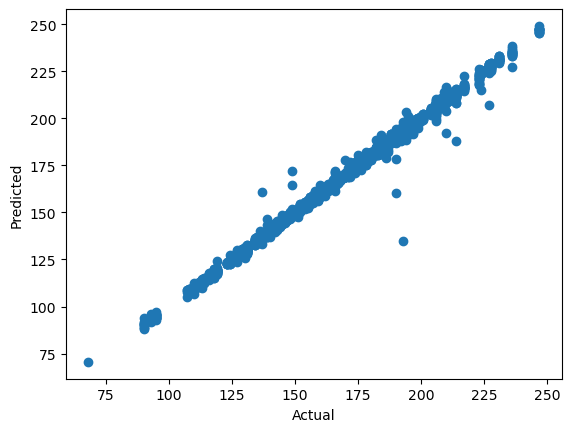

In [68]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

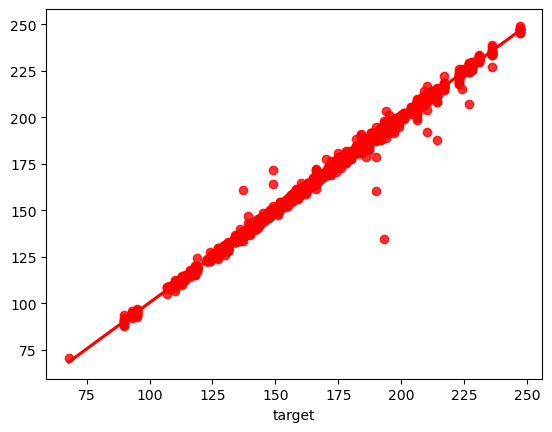

In [69]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Difference between Actual and Predicted Values

In [70]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
171503,154,153.047673,0.952327
88730,175,175.396010,-0.396010
211930,167,168.011982,-1.011982
71707,210,209.284892,0.715108
134205,155,153.664794,1.335206
...,...,...,...
102146,158,157.377870,0.622130
46253,198,196.793602,1.206398
43818,169,168.999801,0.000199
69345,159,158.998541,0.001459


## Lets Load our Pickle Model

In [72]:
import pickle
pickle.dump(cat_model , open('model.pkl','wb'))